In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk import pos_tag

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
import os
os.getcwd( )

'C:\\Users\\Nancy'

In [4]:
os.chdir(r'C:\Users\Nancy\Downloads\bbc_news.csv') 

In [5]:
os.getcwd( )

'C:\\Users\\Nancy\\Downloads\\bbc_news.csv'

In [3]:
tweets = pd.read_excel(r'C:\Users\ASUS\Desktop\data.world Export CoronaVirus Automated Accounts by KUNGFU.AI.xlsx')

In [2]:
bbcnews = pd.read_csv(r'C:\Users\ASUS\Desktop\Capstone project\bbc_news.csv')

In [7]:
bbcnews

title  \
0      Ukraine: Angry Zelensky vows to punish Russian...   
1      War in Ukraine: Taking cover in a town under a...   
2             Ukraine war 'catastrophic for global food'   
3      Manchester Arena bombing: Saffie Roussos's par...   
4      Ukraine conflict: Oil price soars to highest l...   
...                                                  ...   
14758  Euro 2024 qualifiers: New Wales captain Aaron ...   
14759  Budget 2023: What could be in it and when will...   
14760  Unemployment: Who are the millions of Britons ...   
14761   'I earn £30,000 a year and I'm still struggling'   
14762  Pensions: What are the lifetime allowance, sta...   

                             pubDate  \
0      Mon, 07 Mar 2022 08:01:56 GMT   
1      Sun, 06 Mar 2022 22:49:58 GMT   
2      Mon, 07 Mar 2022 00:14:42 GMT   
3      Mon, 07 Mar 2022 00:05:40 GMT   
4      Mon, 07 Mar 2022 08:15:53 GMT   
...                              ...   
14758  Tue, 14 Mar 2023 22:31:13 GMT   
14759  Tue, 14 Mar 2023 22:06:16 GMT   
14760  Tue, 14 Mar 2023 18:13:04 GMT   
14761  Tue, 14 Mar 2023 00:00:03 GMT   
14762  Tue, 14 Mar 2023 18:05:37 GMT   

                                                   guid  \
0      https://www.bbc.co.uk/news/world-europe-60638042   
1      https://www.bbc.co.uk/news/world-europe-60641873   
2          https://www.bbc.co.uk/news/business-60623941   
3                https://www.bbc.co.uk/news/uk-60579079   
4          https://www.bbc.co.uk/news/business-60642786   
...                                                 ...   
14758     https://www.bbc.co.uk/sport/football/64958667   
14759      https://www.bbc.co.uk/news/business-64789405   
14760      https://www.bbc.co.uk/news/business-52660591   
14761      https://www.bbc.co.uk/news/business-64824078   
14762      https://www.bbc.co.uk/news/business-53082530   

                                                    link  \
0      https://www.bbc.co.uk/news/world-europe-606380...   
1      https://www.bbc.co.uk/news/world-europe-606418...   
2      https://www.bbc.co.uk/news/business-60623941?a...   
3      https://www.bbc.co.uk/news/uk-60579079?at_medi...   
4      https://www.bbc.co.uk/news/business-60642786?a...   
...                                                  ...   
14758  https://www.bbc.co.uk/sport/football/64958667?...   
14759  https://www.bbc.co.uk/news/business-64789405?a...   
14760  https://www.bbc.co.uk/news/business-52660591?a...   
14761  https://www.bbc.co.uk/news/business-64824078?a...   
14762  https://www.bbc.co.uk/news/business-53082530?a...   

                                             description  
0      The Ukrainian president says the country will ...  
1      Jeremy Bowen was on the frontline in Irpin, as...  
2      One of the world's biggest fertiliser firms sa...  
3      The parents of the Manchester Arena bombing's ...  
4      Consumers are feeling the impact of higher ene...  
...                                                  ...  
14758  Wales boss Rob Page says Aaron Ramsey's desire...  
14759  The government will reveal how much money it w...  
14760  The unemployment rate is close to its lowest p...  
14761  Young people tell the BBC what help they hope ...  
14762  A big rise in the amount some people can put i...  

[14763 rows x 5 columns]

In [5]:
bbc_text = bbcnews["description"]

In [9]:
bbc_text

0        The Ukrainian president says the country will ...
1        Jeremy Bowen was on the frontline in Irpin, as...
2        One of the world's biggest fertiliser firms sa...
3        The parents of the Manchester Arena bombing's ...
4        Consumers are feeling the impact of higher ene...
                               ...                        
14758    Wales boss Rob Page says Aaron Ramsey's desire...
14759    The government will reveal how much money it w...
14760    The unemployment rate is close to its lowest p...
14761    Young people tell the BBC what help they hope ...
14762    A big rise in the amount some people can put i...
Name: description, Length: 14763, dtype: object

In [10]:
bbc_text.sum()

'The Ukrainian president says the country will not forgive or forget those who murder its civilians.Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee.One of the world\'s biggest fertiliser firms says the conflict could deliver a shock to food supplies.The parents of the Manchester Arena bombing\'s youngest victim speak about their life since she died.Consumers are feeling the impact of higher energy costs as fuel prices and household bills jump.Boris Johnson is to meet the Canadian and Dutch PMs, as MPs debate new laws targeting oligarchs.The home secretary says she is "surging capacity" as about 1% of 5,500 applications are granted.TikTok suspends live streaming and new content from its platform, while Russians can no longer access Netflix.Five things you need to know about the coronavirus pandemic this Monday morning.People have been held in 53 cities, from St Petersburg in the west to Vladivostok in the east.More than 1.5 million U

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(bbc_text.sum().lower())
print(tokens)

['the', 'ukrainian', 'president', 'says', 'the', 'country', 'will', 'not', 'forgive', 'or', 'forget', 'those', 'who', 'murder', 'its', 'civilians', 'jeremy', 'bowen', 'was', 'on', 'the', 'frontline', 'in', 'irpin', 'as', 'residents', 'came', 'under', 'russian', 'fire', 'while', 'trying', 'to', 'flee', 'one', 'of', 'the', 'world', 's', 'biggest', 'fertiliser', 'firms', 'says', 'the', 'conflict', 'could', 'deliver', 'a', 'shock', 'to', 'food', 'supplies', 'the', 'parents', 'of', 'the', 'manchester', 'arena', 'bombing', 's', 'youngest', 'victim', 'speak', 'about', 'their', 'life', 'since', 'she', 'died', 'consumers', 'are', 'feeling', 'the', 'impact', 'of', 'higher', 'energy', 'costs', 'as', 'fuel', 'prices', 'and', 'household', 'bills', 'jump', 'boris', 'johnson', 'is', 'to', 'meet', 'the', 'canadian', 'and', 'dutch', 'pms', 'as', 'mps', 'debate', 'new', 'laws', 'targeting', 'oligarchs', 'the', 'home', 'secretary', 'says', 'she', 'is', 'surging', 'capacity', 'as', 'about', '1', 'of', '5'

In [7]:
# extract and display some sentences and phrases...
sentences = nltk.sent_tokenize(bbc_text.sum())

for s in sentences: print(s)

        

The Ukrainian president says the country will not forgive or forget those who murder its civilians.Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee.One of the world's biggest fertiliser firms says the conflict could deliver a shock to food supplies.The parents of the Manchester Arena bombing's youngest victim speak about their life since she died.Consumers are feeling the impact of higher energy costs as fuel prices and household bills jump.Boris Johnson is to meet the Canadian and Dutch PMs, as MPs debate new laws targeting oligarchs.The home secretary says she is "surging capacity" as about 1% of 5,500 applications are granted.TikTok suspends live streaming and new content from its platform, while Russians can no longer access Netflix.Five things you need to know about the coronavirus pandemic this Monday morning.People have been held in 53 cities, from St Petersburg in the west to Vladivostok in the east.More than 1.5 million Ukra

In [23]:
for s in sentences:
    if "Covid" in s:
        print(s)

How does it feel to be shunned?These Ukrainians say their Russian relatives only trust the narratives they see on TV at home.After Russia seizes two nuclear plant sites, experts weigh the risk to Ukraine and the world at large.There are both strategic and historical reasons why the offensive in southern Ukraine is vital for Russia.Civilian attempts to flee Ukrainian cities being targeted by Russian forces lead Monday's papers.Lesya and Valeri, both civil defence volunteers, tied the knot at a checkpoint near Kyiv.The NGO Herosi are trying to find places for the patients in medical care across Europe.A mother whose son died from heart disease urges parents to know the signs and trust their instincts.Lynette Lee survived the Zeebrugge ferry disaster 35 years ago - one that killed 193 people.A student at Queen's University Belfast used his daily walks to record the sounds of Covid lockdowns.The parents of five-year-old Isla say she is the only child in the world with a rare condition.The 

In [24]:
for s in sentences:
    if "booster" in s:
        print(s)

Now its leaders are trying to predict his next move.A source tells the BBC that up to 200 soldiers were at the Mykolaiv barracks when missiles hit.Street fighting hampers efforts to rescue civilians trapped in a bombed theatre, the mayor says.Up to five million elderly and vulnerable people will be eligible, with the first invites sent this week.The couple were all smiles as they began their week-long tour celebrating the Platinum Jubilee.Detectives want to speak to Maher Maaroufe, 22, following the death of a 19-year-old woman in London.Six fire appliances were sent to deal with the massive blaze on the Wirral.Family of conservationist Morad Tahbaz, 66, say they have been betrayed by the UK government.Police have charged a 24-year-old man in what they allege was a "hate-motivated incident".France strut to a first Grand Slam in 12 years as they run in three tries to comfortably see off England in front of a jubilant Stade de France.The jet is being held at London Biggin Hill airport wh

In [25]:
sentences[0]

'The Ukrainian president says the country will not forgive or forget those who murder its civilians.Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee.One of the world\'s biggest fertiliser firms says the conflict could deliver a shock to food supplies.The parents of the Manchester Arena bombing\'s youngest victim speak about their life since she died.Consumers are feeling the impact of higher energy costs as fuel prices and household bills jump.Boris Johnson is to meet the Canadian and Dutch PMs, as MPs debate new laws targeting oligarchs.The home secretary says she is "surging capacity" as about 1% of 5,500 applications are granted.TikTok suspends live streaming and new content from its platform, while Russians can no longer access Netflix.Five things you need to know about the coronavirus pandemic this Monday morning.People have been held in 53 cities, from St Petersburg in the west to Vladivostok in the east.More than 1.5 million U

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
# recreate token list without stopwords
from nltk.corpus import stopwords
tokens = [token for token in tokens if token not in stopwords.words('english')]


In [10]:
print(tokens)

['ukrainian', 'president', 'says', 'country', 'forgive', 'forget', 'murder', 'civilians', 'jeremy', 'bowen', 'frontline', 'irpin', 'residents', 'came', 'russian', 'fire', 'trying', 'flee', 'one', 'world', 'biggest', 'fertiliser', 'firms', 'says', 'conflict', 'could', 'deliver', 'shock', 'food', 'supplies', 'parents', 'manchester', 'arena', 'bombing', 'youngest', 'victim', 'speak', 'life', 'since', 'died', 'consumers', 'feeling', 'impact', 'higher', 'energy', 'costs', 'fuel', 'prices', 'household', 'bills', 'jump', 'boris', 'johnson', 'meet', 'canadian', 'dutch', 'pms', 'mps', 'debate', 'new', 'laws', 'targeting', 'oligarchs', 'home', 'secretary', 'says', 'surging', 'capacity', '1', '5', '500', 'applications', 'granted', 'tiktok', 'suspends', 'live', 'streaming', 'new', 'content', 'platform', 'russians', 'longer', 'access', 'netflix', 'five', 'things', 'need', 'know', 'coronavirus', 'pandemic', 'monday', 'morning', 'people', 'held', '53', 'cities', 'st', 'petersburg', 'west', 'vladivost

In [12]:
# display and graph the word frequncies, plus a few specific words 
freq_dist = nltk.FreqDist(tokens)
freq_dist
freq_dist['covid', 'booster']

0

In [13]:
Total_covid_words = freq_dist['social distance'] + freq_dist['mask'] + freq_dist['sanitizer'] + freq_dist['wash'] + freq_dist['vaccine'] + freq_dist['isolation'] + freq_dist['outbreak'] + freq_dist['isolation'] 

In [14]:
Total_covid_words

42

In [15]:
Total_covid_word1 = freq_dist['covid'] + freq_dist['outbreak'] + freq_dist['covid-19'] + freq_dist['epidemic'] + freq_dist['2019-nCoV'] + freq_dist['coronavirus'] 

In [16]:
Total_covid_word1

185

In [17]:
print(Total_covid_word1)
print(Total_covid_word1.most_common(20))
Total_covid_word1.plot(20)

185


AttributeError: 'int' object has no attribute 'most_common'

<FreqDist with 18968 samples and 165598 outcomes>
[('says', 1528), ('world', 1015), ('england', 940), ('bbc', 849), ('cup', 756), ('first', 741), ('people', 706), ('new', 693), ('year', 663), ('ukraine', 643), ('uk', 642), ('one', 574), ('say', 564), ('two', 523), ('league', 512), ('final', 478), ('win', 457), ('russia', 431), ('us', 431), ('years', 427)]


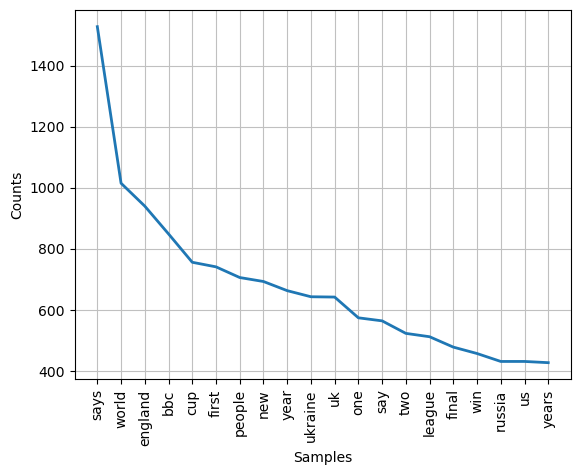

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [59]:
print(freq_dist)
print(freq_dist.most_common(20))
freq_dist.plot(20)

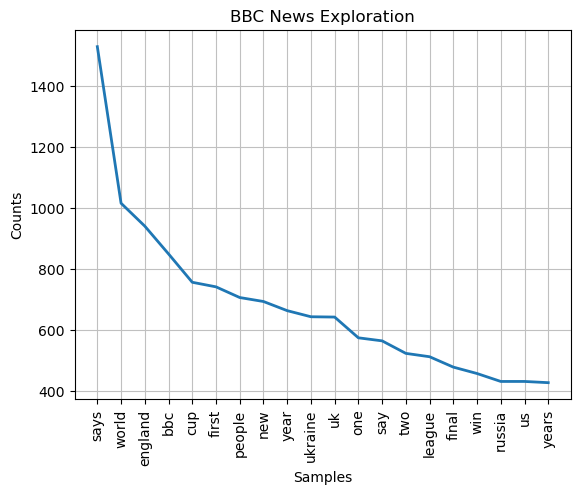

<AxesSubplot:title={'center':'BBC News Exploration'}, xlabel='Samples', ylabel='Counts'>

In [60]:
# Plot of frequently occurring words in BBC News

plt.title('BBC News Exploration')    
freq_dist.plot(20)